In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

In [3]:
df = pd.read_csv("diabetes.csv")

In [4]:
clm0val= ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in clm0val:
    df[col] = df[col].replace(0, df[col].median())

# print("Summary statistics after handling zero values:")
# display(df.describe())

In [5]:
X = df.drop(columns=["Outcome"])
y = df["Outcome"]

In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

Logistic Regression

Logistic Regression Performance:
Accuracy: 0.795
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       389
           1       0.77      0.60      0.67       211

    accuracy                           0.80       600
   macro avg       0.79      0.75      0.76       600
weighted avg       0.79      0.80      0.79       600



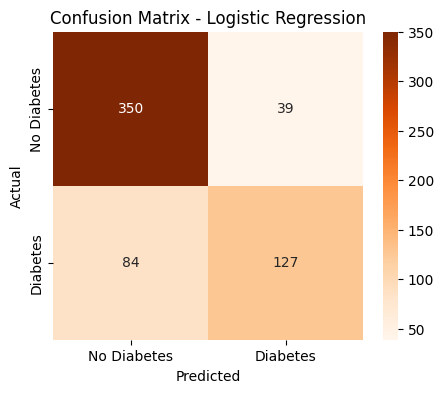

Random Forest

Random Forest Performance:
Accuracy: 0.9716666666666667
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       389
           1       0.96      0.96      0.96       211

    accuracy                           0.97       600
   macro avg       0.97      0.97      0.97       600
weighted avg       0.97      0.97      0.97       600



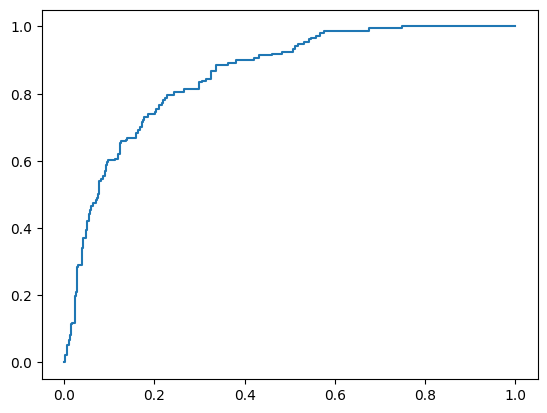

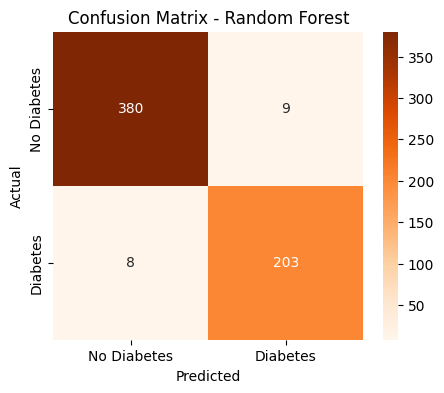

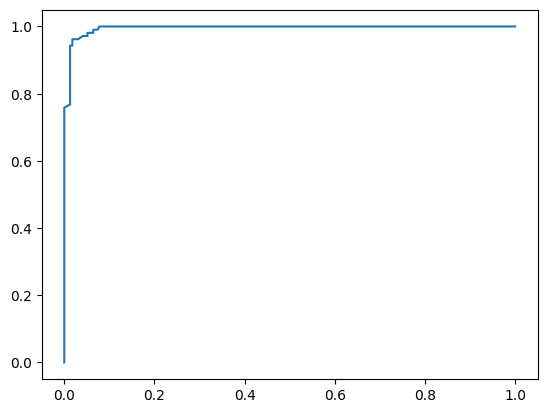

In [13]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

for name, model in models.items():
    print(name)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Step 7: Model Evaluation
    print(f"\n{name} Performance:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    # Step 8: Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
    
    # Step 9: ROC Curve
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc(fpr, tpr):.2f}")

C:\Users\User\AppData\Local\Temp\ipykernel_22088\119301776.py:5: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


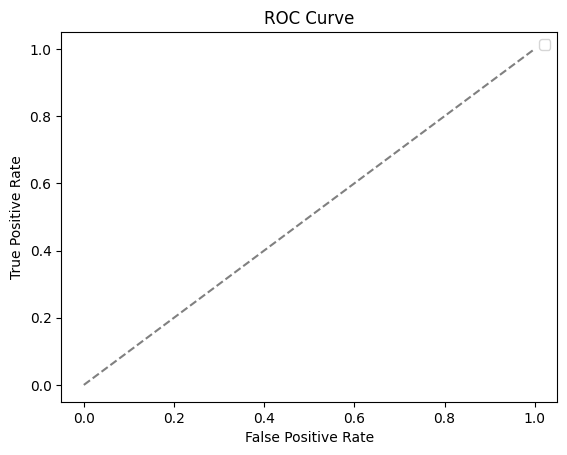

In [12]:
plt.plot([0, 1], [0, 1], linestyle="--", color='grey')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()
